# Demonstration
---

Below you will find a demonstration for loading, instantiating, and utilizing the models developed within this project and published under the `lib/` folder. The only requirements for this Notebook are JupyterLab, Numpy, and MatPlotLib.



In [1]:
# -------------------- IMPORTS -------------------- #

%reset -f

from matplotlib import pyplot as plt
import numpy as np

from lib.DMET import DMET
from lib.CMET import CMET
from lib.Garmin import Garmin
from lib.UnderArmour import UnderArmour
from lib.Zeopoxa import Zeopoxa



With the models imported, they can be instantiated simply as they do not take metadata as inputs and remain as stateless models for your use.

In [2]:
# -------------------- INSTANTIATION -------------------- #

dmet = DMET()
cmet = CMET()
garmin = Garmin()
under_armour = UnderArmour()
zeopoxa = Zeopoxa()



After instantiating the models, their exposed member functions may be used to estimate, for exercise under that model's paradigm (discrete, continuous, or commercial):
- the met units with `Model.met_units(speed)`.
- the calories burned per minute with `Model.calories_per_minute(speed, weight)`
- the total calories burned for the exercise with `Model.total_calories(speed, weight, duration)`

Please recall that all these models expect:
- speeds are averages in miles per hour
- weights are in pounds
- durations are in minutes

In [3]:
# -------------------- ACCESSING FUNCTIONS -------------------- #

duration = 120
weight = 145.0
speed = 16.0

mets = dmet.met_units(speed=speed)
cpm = dmet.calories_per_minute(speed=speed, weight=weight)
total = dmet.total_calories(speed=speed, weight=weight, duration=duration)

print(f"METS: {round(mets, 2)}")
print(f"CPM: {round(cpm, 2)} kcal/min")
print(f"Total: {round(total, 2)} kcal")



METS: 12
CPM: 13.81 kcal/min
Total: 1657.14 kcal


These models can be conveniently compared against each other using plots as demonstrated below.

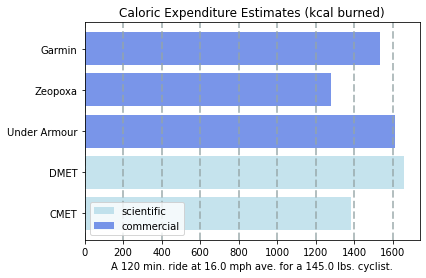

CMET: 1386.57 kcal
DMET: 1657.14 kcal
Garmin: 1532.44 kcal
UnderArmour: 1615.16 kcal
Zeopoxa: 1281.11 kcal


In [4]:
# -------------------- COMPARE ESTIMATES -------------------- #

duration = 120
weight = 145.0
speed = 16.0

dmet_total = dmet.total_calories(speed=speed, weight=weight, duration=duration)
cmet_total = cmet.total_calories(speed=speed, weight=weight, duration=duration)
garmin_total = garmin.total_calories(speed=speed, weight=weight, duration=duration)
under_armour_total = under_armour.total_calories(speed=speed, weight=weight, duration=duration)
zeopoxa_total = zeopoxa.total_calories(speed=speed, weight=weight, duration=duration)

data = [cmet_total, dmet_total, under_armour_total, zeopoxa_total, garmin_total]
labels = ["CMET", "DMET", "Under Armour", "Zeopoxa", "Garmin"]
plt.barh(labels[0:2], data[0:2], color='lightblue', alpha=0.7)
plt.barh(labels[2::], data[2::], color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.xlabel(f"A {duration} min. ride at {speed} mph ave. for a {weight} lbs. cyclist.")
plt.title("Caloric Expenditure Estimates (kcal burned)")
plt.legend(["scientific", "commercial"], loc=3)
plt.show()

print(f"CMET: {round(cmet_total, 2)} kcal")
print(f"DMET: {round(dmet_total, 2)} kcal")
print(f"Garmin: {round(garmin_total, 2)} kcal")
print(f"UnderArmour: {round(under_armour_total, 2)} kcal")
print(f"Zeopoxa: {round(zeopoxa_total, 2)} kcal")



Similarly, models can be run under iteration to determine how they respond to changes in independent variables when other factors are controlled.

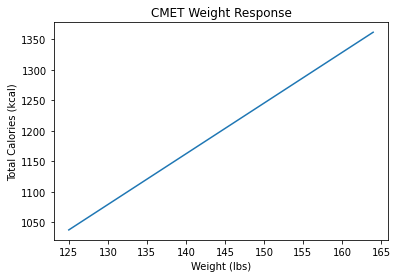

In [5]:
# -------------------- CMET WEIGHT RESPONSE -------------------- #

duration = 120
speed = 14.5

weight_start = 125
weight_stop = 165

weights = list()
calories = list()
for weight in range(weight_start, weight_stop):
    weights.append(weight)
    calories.append(cmet.total_calories(speed=speed, weight=weight, duration=duration))

plt.plot(weights, calories)
plt.title("CMET Weight Response")
plt.xlabel("Weight (lbs)")
plt.ylabel("Total Calories (kcal)");



Hey, look at that: the more you weigh the more calories you burn during exercise. I guess there is a God afterall. Or it's just physics, the more you weight the more energy it takes to move you through space and therefore the more energy you have to expend in the form of calories. Or God, your choice really. But it's definitely physics. God might have created those physics though? And now I won't sleep tonight.

I hope you enjoy the models extended by this project. Should you run into any problems, please open a GitHub issue within this repository and I will address your concerns when I have time. Heads up, there is no guarantee when or if that time will come to be. However, I really liked this project and I hope to see it used. So open up that issue, labor is my only muse.


*Written by Alice Seaborn on June 27, 2021.*